In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import matplotlib.animation as animation
import project

In [2]:
#General plot parameters and size definition
plt.style.use('science')
plt.rcParams["figure.figsize"] = (12,7)
plt.rcParams.update({"axes.grid" : True})

#### Subthreshold Comparisson of the models

We are trying to understand the difference in the 'speed' at which each of the four models reacts to an input current, trying to equalise it if we can.
First, we will have a close look to the model in the subthreshold case

In [3]:
params_HH = project.utils.load_HH()
params_LIF = project.utils.load_LIF()
params_IZH = project.utils.load_ISH(a = 0.03, k_ish= 0.0195)
params_ML = project.utils.load_ML(Ena = 91, Ek = -110)

##### HH model simulation

In [4]:
k = 0.012 #strength of the gap junction coupling
Isyn = [ [0, 0.05] , [0, 0.05]] #delta peak of the chemical synapse
tau = 1 #time constant for the chemical coupling equations
order = 2 #filtering order


#Initial conditions of the HH model
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 


#time constants
dt = 0.01
t_final = 300


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))
for i in range(4999,15000):
    I1[i,0] =1
    I2[i,0] = -1


data2aHH, completeHH_2a, a = project.models.HH_Neuron_Pairs(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I1,Isyn,k,tau)
data2, completeHH_2a_2, a = project.models.HH_Neuron_Pairs(dt,t_final,order,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I2,Isyn,k,tau)

##### LIF model simulation

In [5]:
k = 0.012
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]
order = 2


#Initial conditions for the LIF
y0 = [-70, -70]


#Time constants
t_final = 300
dt = 0.01 


data2aIF, completeIF_2a, a = project.models.LIF_Neuron_Pairs(dt,t_final,order,y0,*params_LIF,I1,Isyn,k,tau,1)
data2b, complete_IF_2a, a = project.models.LIF_Neuron_Pairs(dt,t_final,order,y0,*params_LIF,I2,Isyn,k,tau,1)

##### IZH model simulation

In [6]:
k_izh = 0.04
Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1
order = 2


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))
for i in range(4999,15000):
    I1[i,0] = 1.5
    I2[i,0] = -1.5


#Initial conditions of the IZH model
y0 = [-70,-70]
u0 = [0.0,0.0]


#time constants
dt = 0.01
t_final = 300


data2Ish, completeIsh1, a = project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I1,Is,*params_IZH,k_izh,tau)
data2ish, completeIsh2, a = project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I2,Is,*params_IZH,k_izh,tau)

##### ML model simulation

In [7]:
k_ML = 0.008
tau = 1
Isyn = [[0, 0.05], [0.05, 0]]
Isyn = np.array(Isyn)
order = 2


#Initial conditions for the ML
y0 = [ -71.7061740390072, -71.7061740390072]
w0 = [0.0007223855976593603, 0.0007223855976593603]


#Time constants
t_final = 300
dt = 0.01 


#Input intensities for experiment 2A
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))
for i in range(4999,15000):
    I1[i,0] = 0.5 
    I2[i,0] = -0.5


data2aML, completeML, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I1,Isyn,k_ML,tau)
data2ML, completeML2, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I2,Isyn,k_ML,tau)

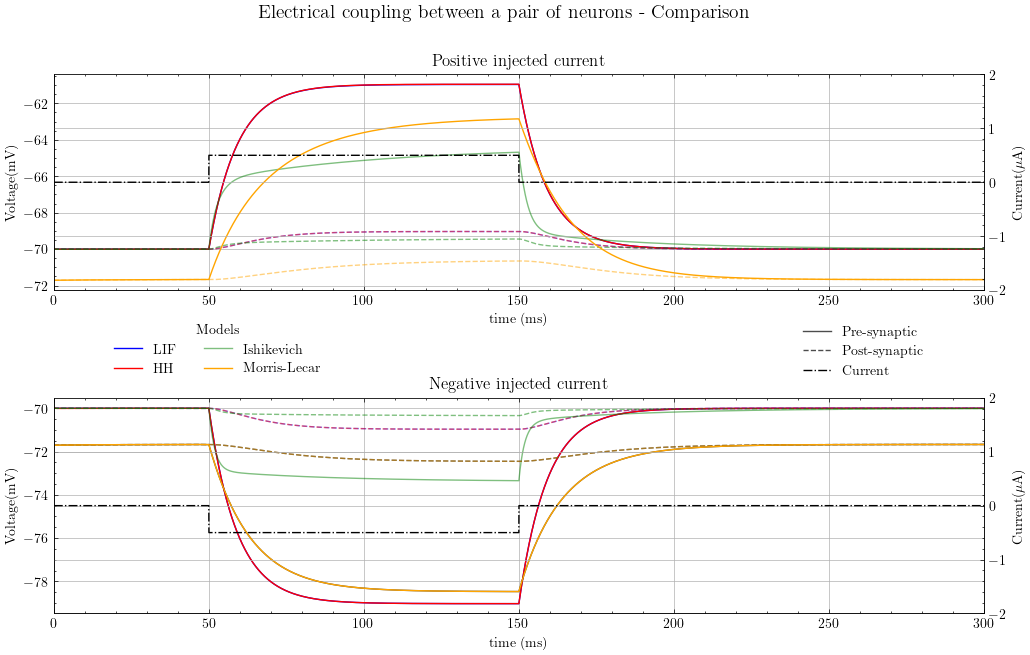

In [8]:
time = np.linspace(0,t_final,int(t_final/dt))
fig, (ax1, ax2) = plt.subplots(2,1) 

fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('time (ms)')
ax2.set_xlabel('time (ms)')
ax1.set_ylabel('Voltage(mV)')
ax2.set_ylabel('Voltage(mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')

ax3 = ax1.twinx()
ax4 = ax2.twinx() 
ax1.title.set_text('Positive injected current')
ax2.title.set_text('Negative injected current')

color = 'black'
ax3.set_ylabel(r'Current($\mu$A)', color = color)
ax4.set_ylabel(r'Current($\mu$A)', color = color)
ax3.tick_params(axis = 'y', labelcolor = color)
ax4.tick_params(axis = 'y', labelcolor = color)

ax3.set_ylim(-2,2)
ax4.set_ylim(-2,2)

fig.suptitle('Electrical coupling between a pair of neurons - Comparison',fontsize=14)
ax1.set_xlim(0,300)
ax2.set_xlim(0,300)
lns1 = ax1.plot(time,data2aIF[:,0], label = 'LIF', color = 'b')
lns2 = ax1.plot(time,data2aHH[:,0], label = 'HH', color = 'r' )
lns3 = ax1.plot(time,data2aIF[:,1], 'b--', alpha = 0.5)
lns4 = ax1.plot(time,data2aHH[:,1], 'r--', alpha = 0.5)
lns5 = ax1.plot(time,data2Ish[:,0], label = 'Ishikevich', color = 'g', alpha = 0.5)
lns6 = ax1.plot(time,data2Ish[:,1], 'g--', alpha = 0.5)
lns7 = ax1.plot(time,data2aML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax1.plot(time,data2aML[:,1], '--',color = 'orange', alpha = 0.5)
lnsc = ax3.plot(time,I1[:,0],'-.', color = 'black')

lns1 = ax2.plot(time,data2b[:,0], label = 'LIF', color = 'b')
lns2 = ax2.plot(time,data2[:,0], label = 'HH', color = 'r')
lns3 = ax2.plot(time,data2b[:,1],'b--', alpha = 0.5)
lns4 = ax2.plot(time,data2[:,1], 'r--', alpha = 0.5)
lns5 = ax2.plot(time,data2ish[:,0], label = 'Izhikevich', color = 'g', alpha = 0.5)
lns6 = ax2.plot(time,data2ish[:,1], 'g--', alpha = 0.5)
lnsp = ax2.plot(time,data2ML[:,0], label = 'Pre-synaptic', alpha=0.7,color = 'black')
lnss = ax2.plot(time,data2ML[:,1], '--',color = 'black', alpha = 0.7, label = 'Post-synaptic')
lns7 = ax2.plot(time,data2ML[:,0], label = 'Morris-Lecar', color = 'orange')
lns8 = ax2.plot(time,data2ML[:,1], '--',color = 'orange', alpha = 0.5)

lnsc = ax4.plot(time,I2[:,0],'-.', label= 'Current',color = 'black')

#ax1.set_ylim(-71.71,-71.71)
#ax1.set_xlim(2950,3000)

#ax2.set_ylim(-71.707,-71.704)
#ax2.set_xlim(2950,3000)
lns = lnsp + lnss + lnsc
labs = [l.get_label() for l in lns]
ax2.legend(lns,labs,loc = (0.8,1.07))
ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 2 )
plt.show()

In [9]:
#Computing the coefficient of transmission looking for the ratio between the deviation from the resting voltage for the pre and post synaptic cells
El = -70
variationHHgj = np.zeros((len(data2aHH[:,0]),1))
deltav1 = np.array(abs(El-data2aHH[:,0]))
deltav2 = np.array(abs(El-data2aHH[:,1]))
gj_transmission = deltav2 / deltav1
variationHHgj[:,0] = gj_transmission

variationLIFgj = np.zeros((len(data2aIF[:,0]), 1))
deltav1 = np.array(abs(El - data2aIF[:,0]))
deltav2 = np.array(abs(El - data2aIF[:,1]))
gj_transmission = deltav2 / deltav1
variationLIFgj[:,0] = gj_transmission

variationIsh = np.zeros((len(data2Ish[:,0]), 1))
deltav1 = np.array(abs(El - data2Ish[:,0]))
deltav2 = np.array(abs(El - data2Ish[:,1]))
gj_transmission = deltav2 / deltav1
variationIsh[:,0] = gj_transmission

variationML = np.zeros((len(data2aML[:,0]), 1))
deltav1 = np.array(abs(-71.70562658780625- data2aML[:,0]))
deltav2 = np.array(abs(-71.70562658780625 - data2aML[:,1]))
gj_transmission = deltav2 / deltav1
variationML[:,0] = gj_transmission

/tmp/ipykernel_3715/1475104122.py:6: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_3715/1475104122.py:12: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1
/tmp/ipykernel_3715/1475104122.py:18: RuntimeWarning: invalid value encountered in divide
  gj_transmission = deltav2 / deltav1


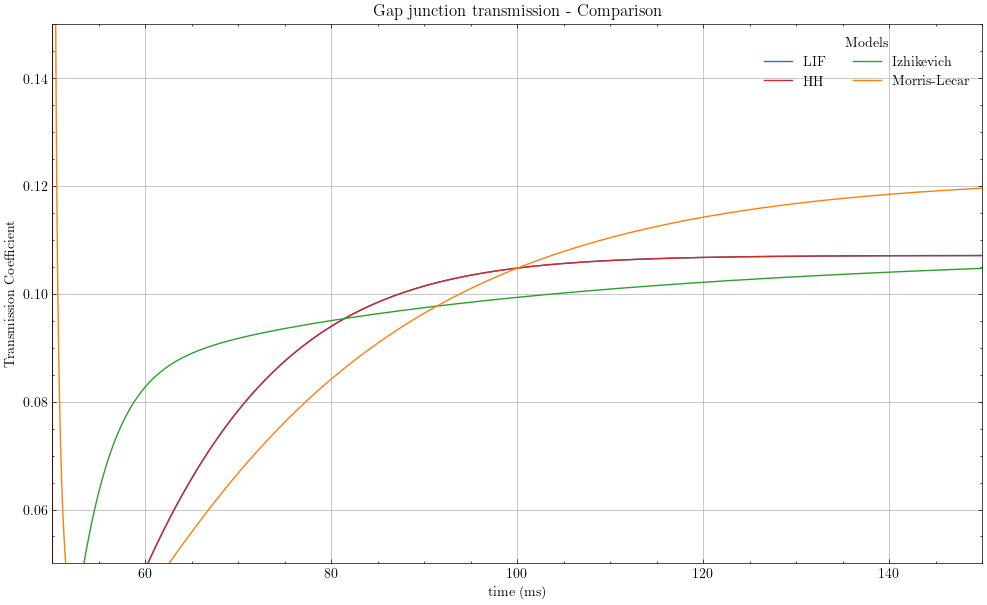

In [10]:
time = np.linspace(0,t_final,int(t_final/dt))
plt.xlabel('time (ms)')
plt.ylabel('Transmission Coefficient')

plt.xlim(50,150)
plt.ylim(0.05,0.15)

plt.plot(time,variationLIFgj, color = 'tab:blue', label = 'LIF')
plt.plot(time,variationHHgj, color = 'tab:red' ,label = 'HH')
plt.plot(time,variationIsh, color = 'tab:green',label = 'Izhikevich')
plt.plot(time,variationML, color = 'tab:orange', label = 'Morris-Lecar')
plt.title('Gap junction transmission - Comparison')
plt.legend(title='Models',ncols=2)

#### Trace Comparisson

Once we obtained a modified speed of the models, we want to know how does that influence the post-threshold dynamics. For that, we are redoing our voltageprofiling simulations

##### HH model

In [11]:
#Initial conditions & the intensity
v0 = -65 
n0 = 0
m0 = 0
h0 = 0
y0 = [v0,n0,m0,h0]
Isyn = np.zeros(([2 , 2 ]))
I = [2.5, 0]


#vtime constants
dt = 0.001
t_final = 300

data_HH, residue_HH, a = project.models.HH_Neuron_Pairs(dt,t_final,2,[v0,v0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,0,1)

(0.0, 50.0)

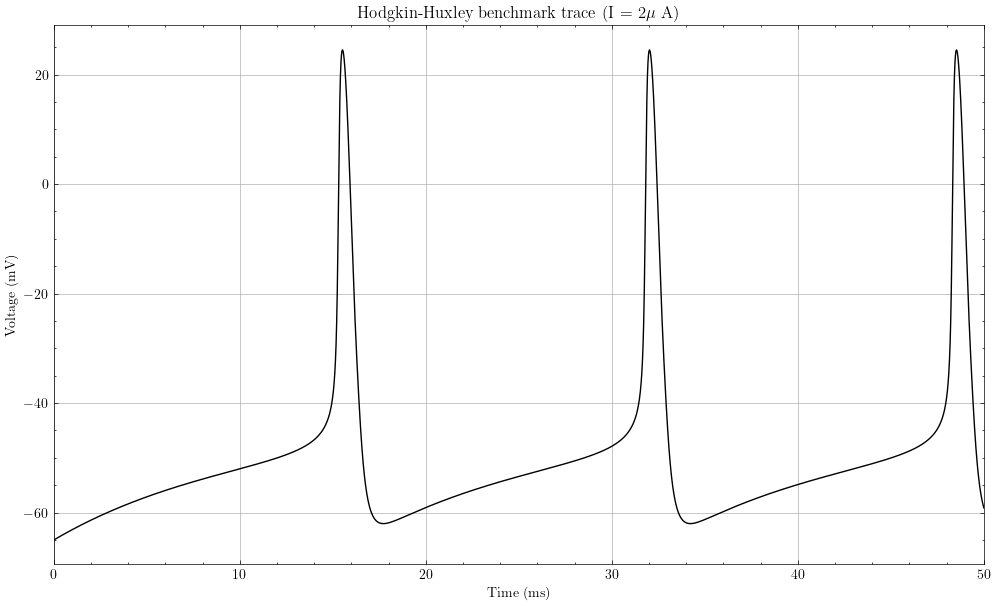

In [12]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black')
plt.title(r'Hodgkin-Huxley benchmark trace (I = 2$\mu$ A)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.xlim(0,50)


##### IZH model

In [13]:
#time constants
dt = 0.001
t_final = 300


#intensity
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1


I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))
for i in range(0,int(t_final/dt)):
    I1[i,0] = 3
    I2[i,0] = 0
order = 2


#initial conditions
y0 = [-65,-65]
u0 = [0.0,0.0]


data2Ish_new, completeIsh1_new, a= project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I1,Is,*params_IZH,0,tau)

(0.0, 50.0)

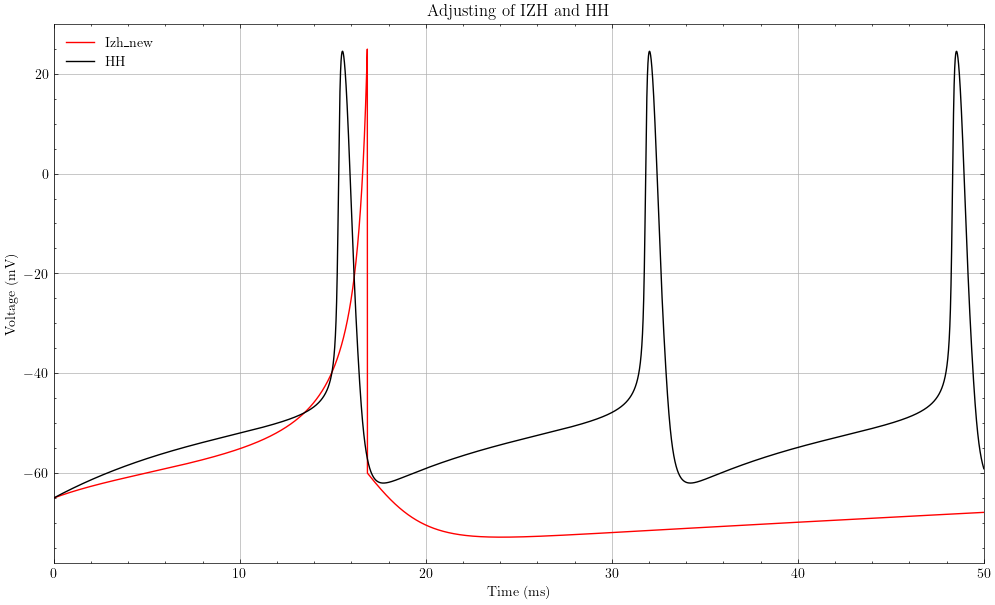

In [14]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data2Ish_new[:,0], color = 'red', label = 'Izh_new')
plt.plot(time,data_HH[:,0], color = 'black', label = 'HH')

plt.title(r'Adjusting of IZH and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)

##### ML model

In [15]:
k = 0.00

#time constants
dt = 0.001
t_final = 300


#intensity
Isyn = [[0, 0.0], [0.0, 0]]
Is = np.array(Isyn)
tau = 1
I1 = np.zeros((int(t_final/dt),2))
I2 = np.zeros((int(t_final/dt),2))
for i in range(0,int(t_final/dt)):
    I1[i,0] = 2.5
    I2[i,0] = 0
order = 2


#initial conditions
y0 = [-65 , -65]
w0 = [0.00, 0.00]


data2aML, completeML, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I1,Is,k,tau)

(0.0, 50.0)

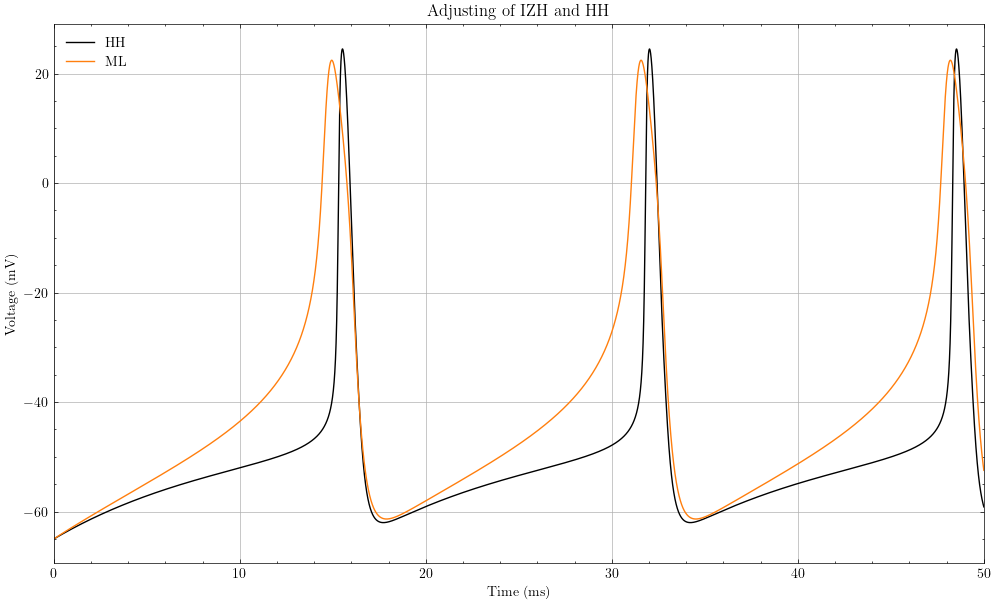

In [16]:
time = np.linspace(0,t_final,int(t_final/dt),)
plt.plot(time,data_HH[:,0], color = 'black', label = 'HH')
plt.plot(time,data2aML[:,0], color = 'tab:orange', label = 'ML')
plt.title(r'Adjusting of IZH and HH')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.legend()
plt.xlim(0,50)

#### Efficiency

Now, we are going to look at how the efficiency has changed as a result of the changes in the parameters

##### General parameter re-definition

In [17]:

k = 0.012
k_izh = 0.04
k_ML = 0.008

Isyn = [[0, 0.05], [0.05, 0]]
Is = np.array(Isyn)
tau = 1

y0 = [-70,-70]
u0 = [0.0,0.0]

w0 = [0.0007223855976593603, 0.0007223855976593603]


#Initial conditions of the HH model important quantities
V0 = -70
n0 =0.2
m0 = 0.1
h0 = 0.6 

order = 2


t_final = 4000
dt = 0.01

##### HH model simulation

In [18]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))


#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_HH_total_1 = np.zeros((len(f),len(t)))
data_HH_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 0.4 + 0.35*np.sin(2 * np.pi * f[i] * t)


    #computing and storing the simulation
    data4b_HH, completeHH_4b, a = project.models.HH_Neuron_Pairs(dt,t_final,1,[V0,V0],[n0,n0],[m0,m0],[h0,h0],*params_HH,I,Isyn,k,tau)
    data_HH_total_1[i] = data4b_HH[:,0]
    data_HH_total_2[i] = data4b_HH[:,1]
    end = len(data4b_HH)


    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_HH[10000:end-1,1]) - np.min(data4b_HH[10000:end-1,1]) ) / ( np.max(data4b_HH[10000:end-1,0]) - np.min(data4b_HH[10000:end-1,0]) )


        time_diff = project.utils.phases(data4b_HH[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)

    else:
        coef[i] = ( np.max(data4b_HH[80000:end-1,1]) - np.min(data4b_HH[80000:end-1,1]) ) / ( np.max(data4b_HH[80000:end-1,0]) - np.min(data4b_HH[80000:end-1,0]) )


        time_diff = project.utils.phases(data4b_HH[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_HH_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fHH = f
coefHH = coef
phasesHH = phases_test

##### LIF model simulation

In [19]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))

#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_IF_total_1 = np.zeros((len(f),len(t)))
data_IF_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 0.4+ 0.35*np.sin(2 * np.pi * f[i] * t)

    
    #computing and storing the simulation
    data4b_IF, complete_IF_4b, a = project.models.LIF_Neuron_Pairs(dt, t_final,order,y0,*params_LIF,I,Is,k,tau,1)
    end = len(data4b_IF)
    data_IF_total_1[i] = data4b_IF[:,0]
    data_IF_total_2[i] = data4b_IF[:,1]


    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_IF[10000:,1]) - np.min(data4b_IF[10000:,1]) ) / ( np.max(data4b_IF[10000:,0]) - np.min(data4b_IF[10000:,0]) )


        time_diff = project.utils.phases(data4b_IF[10000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
            
    else:
        coef[i] = ( np.max(data4b_IF[80000:end-1,1]) - np.min(data4b_IF[80000:end-1,1]) ) / ( np.max(data4b_IF[80000:end-1,0]) - np.min(data4b_IF[80000:end-1,0]) )


        time_diff = project.utils.phases(data4b_IF[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_IF_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fIF= f 
coefIF = coef
phasesIF = phases_test

##### IZH model simulation

In [20]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))


#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_IZH_total_1 = np.zeros((len(f),len(t)))
data_IZH_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 1.0 + 0.5*np.sin(2 * np.pi * f[i] * t)


    #computing and storing the simulation
    data4b_Ish, complete_Ish_4b, a = project.models.IZH_Neuron_Pairs(dt,t_final,order,y0,u0,I,Is,*params_IZH,k_izh,tau)
    end = len(data4b_Ish)
    data_IZH_total_1[i] = data4b_Ish[:,0]
    data_IZH_total_2[i] = data4b_Ish[:,1]
    
    
    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_Ish[70000:end-1,1]) - np.min(data4b_Ish[70000:end-1,1]) ) / ( np.max(data4b_Ish[70000:end-1,0]) - np.min(data4b_Ish[70000:end-1,0]) )


        time_diff  = project.utils.phases(data4b_Ish[10000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        coef[i] = ( np.max(data4b_Ish[70000:end-1,1]) - np.min(data4b_Ish[70000:end-1,1]) ) / ( np.max(data4b_Ish[70000:end-1,0]) - np.min(data4b_Ish[70000:end-1,0]) )


        time_diff  = project.utils.phases(data4b_Ish[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_IZH_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fISH = f
coefISH = coef
phasesISH= phases_test

##### ML model simulation

In [21]:
#Defining the base intensity to then modify into a sine wave function
I = np.zeros((int(t_final/dt),2))
t = np.linspace(0,t_final,int(t_final/dt))


#defining the frequencies, we have the initial set of frequencies to correspond the experiment, then we'll add additional frequencies
f_log = np.linspace(-3,-1,int(2/0.1))
f = 10**f_log
extra_f = np.linspace(0.15,0.9,16)
f = np.append(f,extra_f)


#variables used to store the resulting coefficient and delay
coef = np.zeros((len(f),1))
phases_test = np.zeros((len(f),1))


#variables used to store the data
data_ML_total_1 = np.zeros((len(f),len(t)))
data_ML_total_2 = np.zeros((len(f),len(t)))


#simulation to obtain the efficiency
for i in range(0,len(f)):
    #defining the intensity in function of frequency
    I[:,0] = 0.3 + 0.4*np.sin(2 * np.pi * f[i] * t)


    #computing and storing the simulation
    data4b_ML, complete_ML_4b, a = project.models.ML_Neuron_Pairs(dt,t_final,2,y0,w0,*params_ML,I,Isyn,k_ML,tau)
    end = len(data4b_ML)
    data_ML_total_1[i] = data4b_ML[:,0]
    data_ML_total_2[i] = data4b_ML[:,1]

    
    #computing the efficiency, chunking off the initial part of the simulation to ensure that we are on the steady state
    if i < 9:
        coef[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )


        time_diff = project.utils.phases(data4b_ML[5000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    elif i == 9:
        coef[i] = ( np.max(data4b_ML[10000:,1]) - np.min(data4b_ML[10000:,1]) ) / ( np.max(data4b_ML[10000:,0]) - np.min(data4b_ML[10000:,0]) )


        time_diff = project.utils.phases(data4b_ML[70000:end-1],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)
    else:
        coef[i] = ( np.max(data4b_ML[10000:end-1,1]) - np.min(data4b_ML[10000:end-1,1]) ) / ( np.max(data4b_ML[10000:end-1,0]) - np.min(data4b_ML[10000:end-1,0]) )


        time_diff = project.utils.phases(data4b_ML[80000:end-1,:],dt)
        phases_test[i] = 360 * f[i] * time_diff
        if phases_test[i] > 90:
            phases_test[i] = 90 - abs(phases_test[i]-90)


#recomputing the coefficients, normalise by their maximum (which corresponds to the one at the lowest frequency)
f = 1000*f 
coef_ML_og = coef
coef = coef * 100 
for i in range(1,len(f)):
    coef[i] = coef[i] * 100 / coef[0]
coef[0] = 100


#storing the values
fML= f 
coefML = coef
phasesML= phases_test

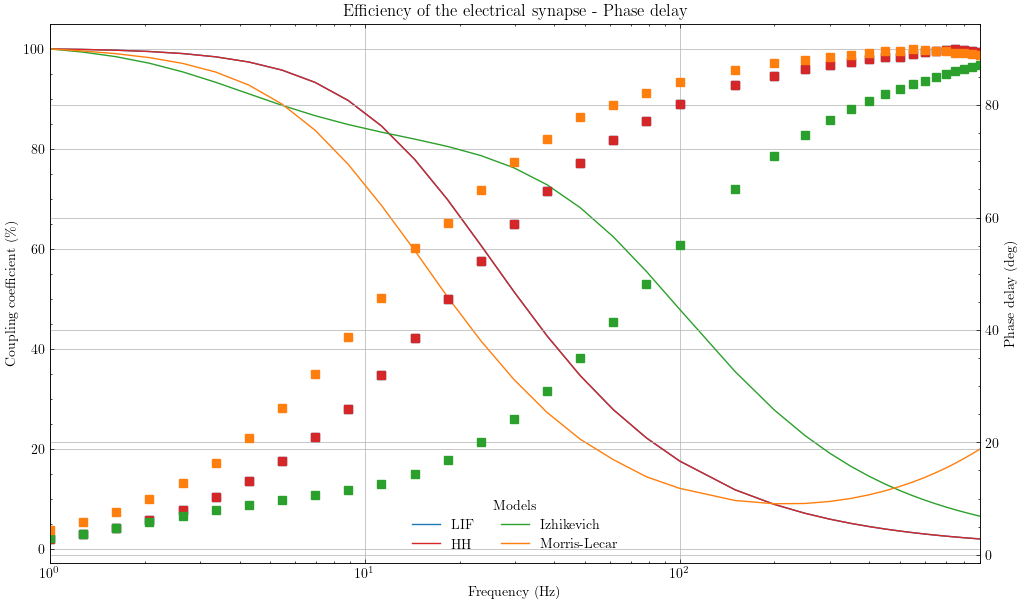

In [22]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Phase delay')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient (\%)')
ax1.set_xlim(1,900)

ax2.set_ylabel('Phase delay (deg)')

ax2.plot(fIF,phasesIF, 's', color = 'tab:blue')
ax2.plot(fHH,phasesHH, 's', color = 'tab:red')
ax2.plot(fISH,phasesISH, 's', color = 'tab:green')
ax2.plot(fML,phasesML, 's', color = 'tab:orange')

ax1.plot(fIF,coefIF, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,coefHH, color = 'tab:red',label= 'HH')
ax1.plot(fISH, coefISH,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,coefML, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2, loc = 'lower center')

##### Absolute transmission

One way to check the problem is not caused by the normalisation of the coefficients, we are plotting the absolute transmission

/tmp/ipykernel_3715/2394805852.py:9: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(0,900)


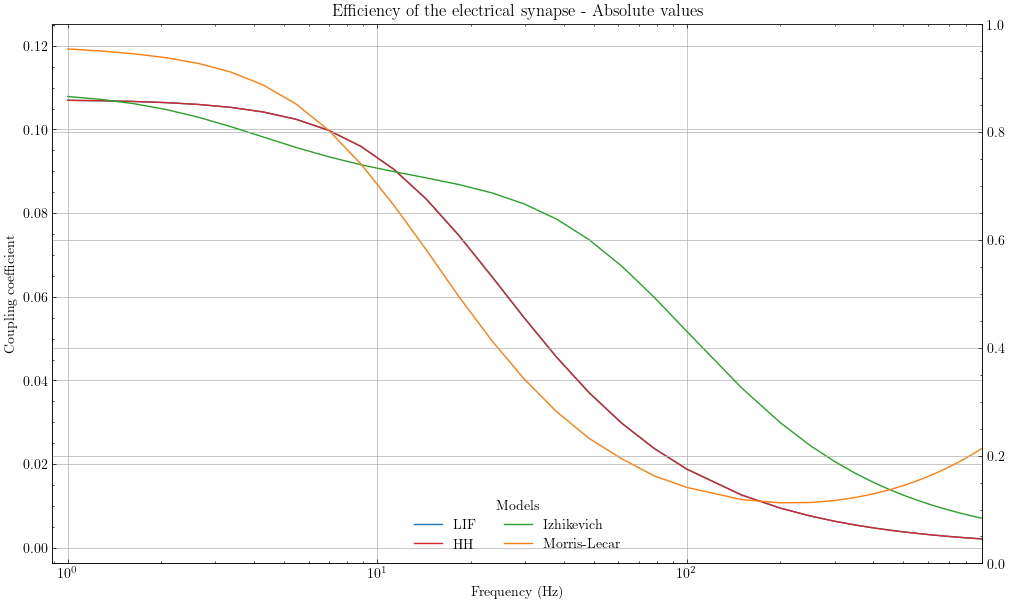

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_title('Efficiency of the electrical synapse - Absolute values')
ax1.set_xscale('log')

ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Coupling coefficient')
ax1.set_xlim(0,900)


ax1.plot(fIF,coef_IF_og, color = 'tab:blue',label = 'LIF')
ax1.plot(fHH,coef_HH_og, color = 'tab:red',label= 'HH')
ax1.plot(fISH, coef_IZH_og,color = 'tab:green', label = 'Izhikevich')
ax1.plot(fML,coef_ML_og, color = 'tab:orange', label = 'Morris-Lecar')

ax1.legend(title='Models',ncols=2, loc = 'lower center')

##### Voltage traces

After obtaining the resulting efficiency, one way to make sure we are still in a transient state is to look at the traces for the voltage. Looking at them could also give
us insight as to their differences

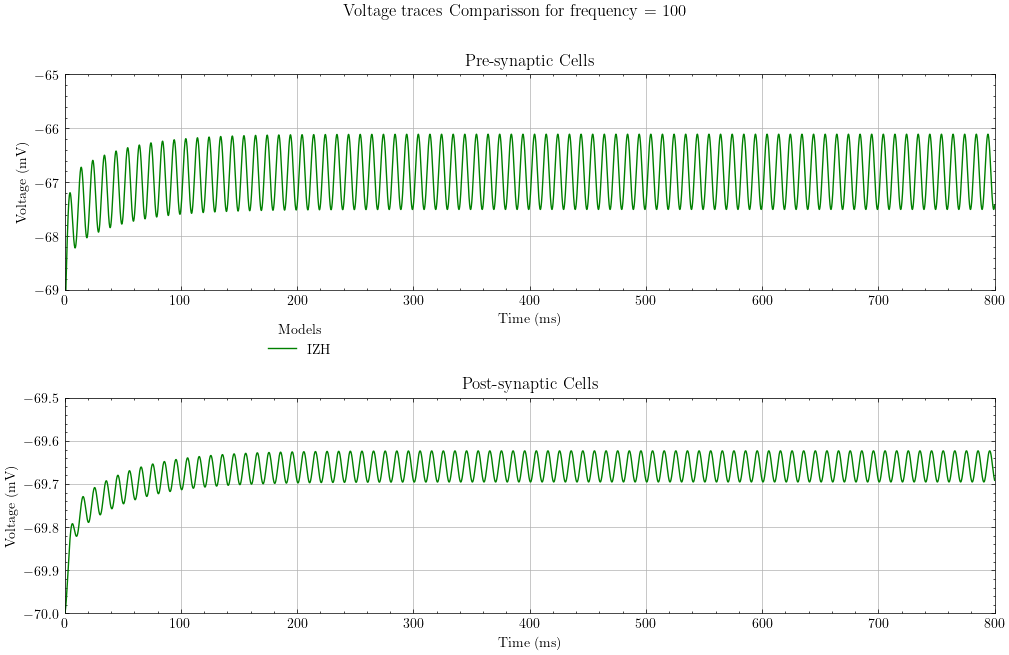

In [27]:
time = np.linspace(0,t_final,int(t_final/dt))
fig, (ax1, ax2) = plt.subplots(2,1)

fig.suptitle('Voltage traces Comparisson for frequency = ' + str(int(f[19])))
fig.subplots_adjust(hspace=0.5)
ax1.set_xlabel('Time (ms)')
ax2.set_xlabel('Time (ms) ')
ax1.set_ylabel('Voltage (mV)')
ax2.set_ylabel('Voltage (mV)')
ax1.tick_params(axis = 'y')
ax2.tick_params(axis = 'y')

ax1.title.set_text('Pre-synaptic Cells')
ax2.title.set_text('Post-synaptic Cells')

#ax1.plot(time,data_HH_total_1[19,:], color = 'red', label = 'HH')
ax1.plot(time,data_IZH_total_1[19,:], color= 'green', label = 'IZH')
#ax1.plot(time,data_IF_total_1[19,:], color = 'blue', label = 'IF')
ax1.set_xlim(0,800)
ax1.set_ylim(-69,-65)

#ax2.plot(time,data_HH_total_2[19,:], color = 'red')
ax2.plot(time,data_IZH_total_2[19,:], color= 'green')
#ax2.plot(time,data_IF_total_2[19,:], color = 'blue')
ax2.set_xlim(0,800)
ax2.set_ylim(-70,-69.5)

ax1.legend(title='Models',bbox_to_anchor =( 0.3,-0.1), ncols = 3 )
plt.show()